# Problema 26, 27 y 28
## 26)
Calcularemos numéricamente, utilizando la integración de Romberg, la integral <br>
<center> $I = \int_{0}^{\pi}sin(x) dx = 2$ </center> <br>

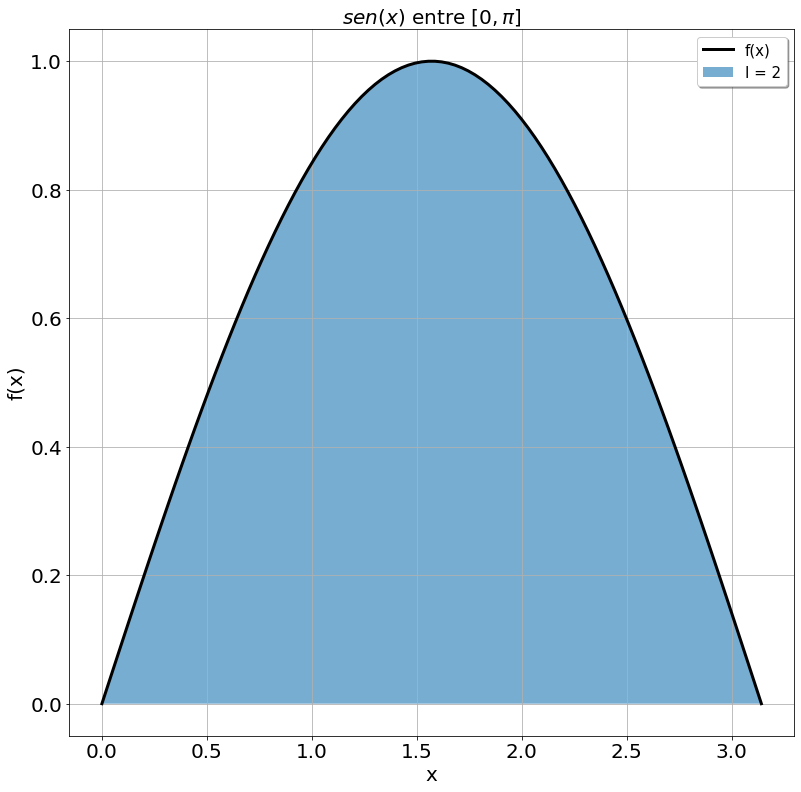

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

x = np.linspace(0,pi,100) #dom
y = np.sin(x) #f(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=3,label='f(x)')
plt.fill_between(x,y,alpha=0.6,label='I = 2')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.title('$sen(x)$ entre $[0,\pi]$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

In [69]:
#Veamos numéricamente:

#Para llegar al término R_6,6 de Romberg, se siguen pasos muy parecidos a la extrapolación de Richardson:
#Copiamos el formato del Problema 17, pero en vez de hacer la tabla de D_ji, definimos a R_kj:

#El método de Romberg consta de tomar pts separados por steps h_k, hacer la Regla del Trapecio,
#repetir para h_k+1 = h_k/2 y así converger a una solución:

def f(x):
    y = np.sin(x)
    return y

def Romberg(o,a,b,f): #"o" = orden, (a,b) = dominio, f = func

    R = np.zeros([o,o]) #matriz de pasos x orden: fila k => h/(2^k); columna i => operador R_i 

    h = (b-a) #step inicial
    e = 1 #error (value default)

    R[0,0] = 0.5*h*(f(a)+f(b)) #1º elemento de la matriz
    print('h =',h,'\n\nR_00 =',R[0,0])
    k = 0 #contador (2^k - 1 = cantidad de puntos intermedios entre a y b)

    while k < o-1: #pedimos un error de 10^-6

        k += 1 #contar

        h = h/2 #el loop lo comenzamos desde la 2º fila
        print('\nh =',h)

        #Recursividad:
        Sr = 0
        for i in range(1,(2**(k-1))+1):
                Sr += f(a + (2*i - 1)*h)

        R[k,0] = 0.5*(R[k-1,0] + 2*h*Sr)

        print('\nR_',k,'0 =',R[k,0])

        for j in range(1,k+1): #recursividad para columnas 2,...,k

            R[k,j] = R[k,j-1] + (R[k,j-1] - R[k-1,j-1])/(4**j - 1)
            print('R_',k,j,'=',R[k,j])

            e = abs(R[k,j]-R[k,j-1]) #el error es la dif entre D sucesivos dado el paso h_j

        print('\nerror = ',e)

    print("El valor de I es =",R[k,k],'con un error =',e)
    
    return R

Romberg(6,0,pi,f);

h = 3.141592653589793 

R_00 = 1.9236706937217898e-16

h = 1.5707963267948966

R_ 1 0 = 1.5707963267948966
R_ 1 1 = 2.0943951023931953

error =  0.5235987755982987

h = 0.7853981633974483

R_ 2 0 = 1.8961188979370398
R_ 2 1 = 2.0045597549844207
R_ 2 2 = 1.9985707318238357

error =  0.0059890231605850275

h = 0.39269908169872414

R_ 3 0 = 1.974231601945551
R_ 3 1 = 2.000269169948388
R_ 3 2 = 1.999983130945986
R_ 3 3 = 2.000005549979671

error =  2.2419033685050493e-05

h = 0.19634954084936207

R_ 4 0 = 1.9935703437723395
R_ 4 1 = 2.0000165910479355
R_ 4 2 = 1.999999752454572
R_ 4 3 = 2.0000000162880416
R_ 4 4 = 1.9999999945872902

error =  2.1700751418052278e-08

h = 0.09817477042468103

R_ 5 0 = 1.9983933609701445
R_ 5 1 = 2.0000010333694127
R_ 5 2 = 1.9999999961908446
R_ 5 3 = 2.0000000000596745
R_ 5 4 = 1.9999999999960338
R_ 5 5 = 2.000000000001321

error =  5.2873261324748455e-12
El valor de I es = 2.000000000001321 con un error = 5.2873261324748455e-12


## 27)

Ahora queremos saber el valor de <br>
<center> $I = \int_{0}^{1} \frac{e^{-2x}dx}{1+4x} \approx 0.220458$ </center> <br>

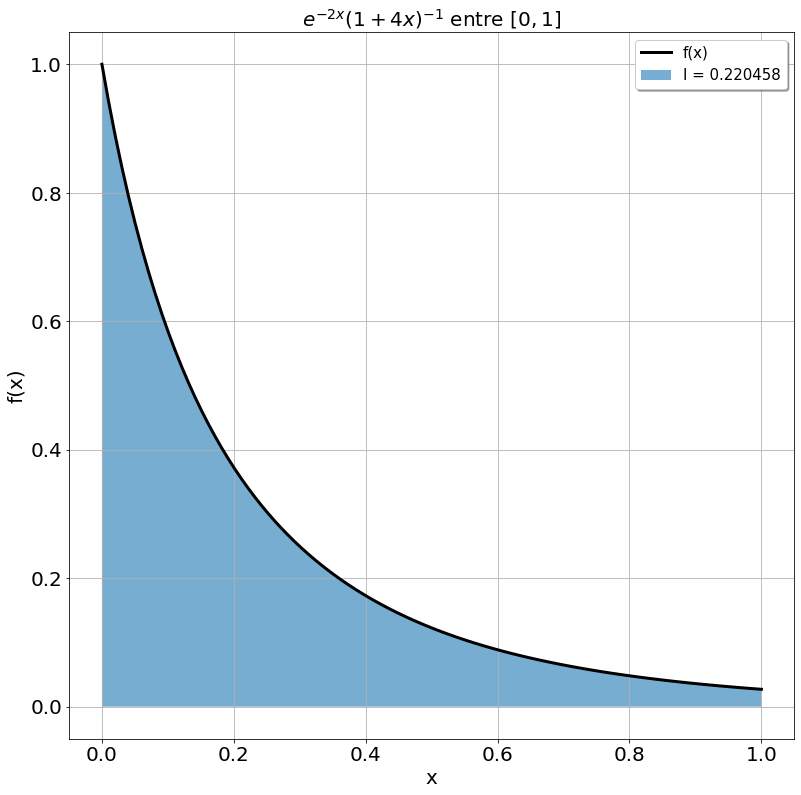

In [70]:
x = np.linspace(0,1,100) #dom
y = np.exp(-2*x)/(1+4*x) #f(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=3,label='f(x)')
plt.fill_between(x,y,alpha=0.6,label='I = 0.220458')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.title('$e^{-2x}(1+4x)^{-1}$ entre $[0,1]$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

In [71]:
def f(x):
    y = np.exp(-2*x)/(1+4*x)
    return y

Romberg(6,0,1,f);

h = 1 

R_00 = 0.5135335283236613

h = 0.5

R_ 1 0 = 0.318080004357071
R_ 1 1 = 0.2529288297015409

error =  0.06515117465553011

h = 0.25

R_ 2 0 = 0.24880196965189155
R_ 2 1 = 0.22570929141683174
R_ 2 2 = 0.22389465553118446

error =  0.0018146358856472866

h = 0.125

R_ 3 0 = 0.22797874587725972
R_ 3 1 = 0.22103767128571578
R_ 3 2 = 0.22072622994364138
R_ 3 3 = 0.22067593747399783

error =  5.0292469643553606e-05

h = 0.0625

R_ 4 0 = 0.222373671948229
R_ 4 1 = 0.2205053139718854
R_ 4 2 = 0.22046982348429672
R_ 4 3 = 0.2204657535404976
R_ 4 4 = 0.22046492928977798

error =  8.242507196221105e-07

h = 0.03125

R_ 5 0 = 0.22093950302648402
R_ 5 1 = 0.2204614467192357
R_ 5 2 = 0.22045852223572573
R_ 5 3 = 0.22045834285082777
R_ 5 4 = 0.22045831378929964
R_ 5 5 = 0.22045830732253477

error =  6.466764873591657e-09
El valor de I es = 0.22045830732253477 con un error = 6.466764873591657e-09


## 28)

Por último, queremos el valor de <br>
<center> $I = \int_{0}^{1} x^{1/3} dx = 0.75$ </center> <br>

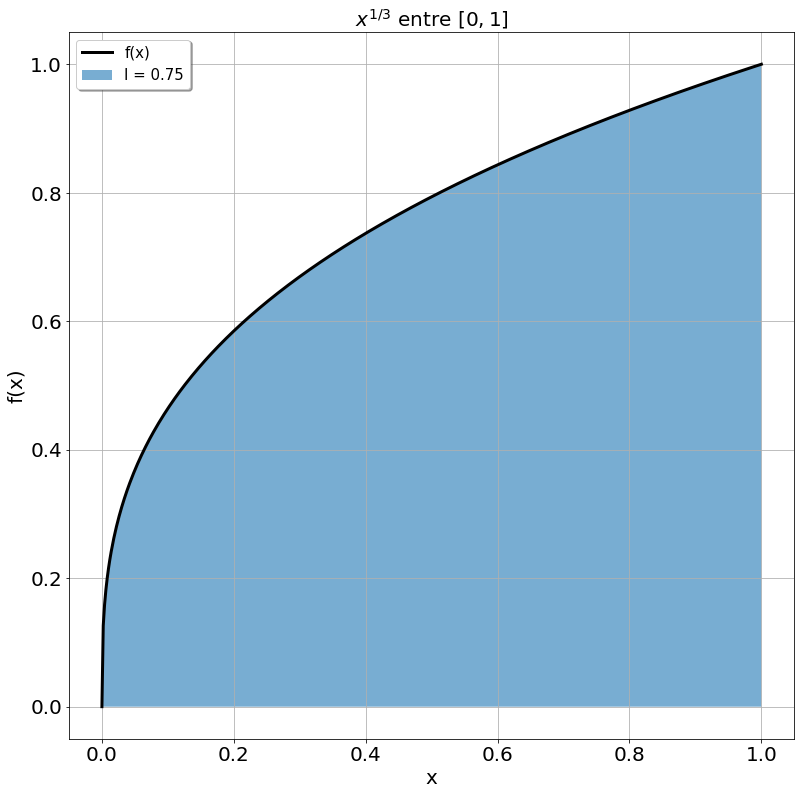

In [72]:
x = np.linspace(0,1,500) #dom
y = x**(1/3) #f(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=3,label='f(x)')
plt.fill_between(x,y,alpha=0.6,label='I = 0.75')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.title('$x^{1/3}$ entre $[0,1]$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

In [73]:
def f(x):
    y = x**(1/3)
    return y

Romberg(6,0,1,f);

h = 1 

R_00 = 0.5

h = 0.5

R_ 1 0 = 0.6468502629920498
R_ 1 1 = 0.6958003506560665

error =  0.04895008766401665

h = 0.25

R_ 2 0 = 0.7080553368369016
R_ 2 1 = 0.7284570281185189
R_ 2 2 = 0.730634139949349

error =  0.0021771118308301363

h = 0.125

R_ 3 0 = 0.7330999621532317
R_ 3 1 = 0.7414481705920084
R_ 3 2 = 0.7423142467569077
R_ 3 3 = 0.7424996452776627

error =  0.00018539852075494245

h = 0.0625

R_ 4 0 = 0.7432295202602446
R_ 4 1 = 0.7466060396292489
R_ 4 2 = 0.7469498975650649
R_ 4 3 = 0.7470234793239245
R_ 4 4 = 0.7470412198495961

error =  1.7740525671605667e-05

h = 0.03125

R_ 5 0 = 0.7472972016830262
R_ 5 1 = 0.74865309549062
R_ 5 2 = 0.748789565881378
R_ 5 3 = 0.748818766965764
R_ 5 4 = 0.7488258073094575
R_ 5 5 = 0.7488275517742277

error =  1.744464770192522e-06
El valor de I es = 0.7488275517742277 con un error = 1.744464770192522e-06


En el último caso vemos que el término *$R_{6,6}$* no es suficiente como para obtener un valor tan cercano al valor analítico como los demás. <br>
Por como definimos el *"error"*, el programa nos muestra un error mucho menor al real, dado a que <br>
<center> $0.75 - R_{6,6} \approx 0.012 \gg 10^{-8}$ </center> <br>
Suponemos que esto se debe al elevado valor de la derivada de $f(x)$ cerca de $x = 0$. <br>
Luego, probemos por completitud has ta ordenes mayores, a ver si se acerca más a $0.75$:

In [75]:
Romberg(10,0,1,f);

h = 1 

R_00 = 0.5

h = 0.5

R_ 1 0 = 0.6468502629920498
R_ 1 1 = 0.6958003506560665

error =  0.04895008766401665

h = 0.25

R_ 2 0 = 0.7080553368369016
R_ 2 1 = 0.7284570281185189
R_ 2 2 = 0.730634139949349

error =  0.0021771118308301363

h = 0.125

R_ 3 0 = 0.7330999621532317
R_ 3 1 = 0.7414481705920084
R_ 3 2 = 0.7423142467569077
R_ 3 3 = 0.7424996452776627

error =  0.00018539852075494245

h = 0.0625

R_ 4 0 = 0.7432295202602446
R_ 4 1 = 0.7466060396292489
R_ 4 2 = 0.7469498975650649
R_ 4 3 = 0.7470234793239245
R_ 4 4 = 0.7470412198495961

error =  1.7740525671605667e-05

h = 0.03125

R_ 5 0 = 0.7472972016830262
R_ 5 1 = 0.74865309549062
R_ 5 2 = 0.748789565881378
R_ 5 3 = 0.748818766965764
R_ 5 4 = 0.7488258073094575
R_ 5 5 = 0.7488275517742277

error =  1.744464770192522e-06

h = 0.015625

R_ 6 0 = 0.7489234103727431
R_ 6 1 = 0.7494654799359821
R_ 6 2 = 0.7495196388990063
R_ 6 3 = 0.7495312273596035
R_ 6 4 = 0.7495340213219324
R_ 6 5 = 0.7495347136132446
R_ 6 6 = 0.749534886302

Vemos que $R_{10,10}$ es bastante más cercano a $0.75$. Luego, el método converge tan lento como "pasos" de a $\sim 10^{-10}$ en cada iteración, para esta función en particular.